In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn visualization library
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# Hi there, to get started lets import and visualize the data

**Import the data**

In [2]:
heart_df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

**Lets see how much data we workin with**

In [3]:
heart_df.shape

(303, 14)

**Small dataset but nothing to worry about**

**Lets look at the features**

In [4]:
heart_df.sample(6)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


**Any values missing?**

In [5]:
heart_df.isnull().sum().sort_values(ascending=False)[:]

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
heart_df.isna().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

**Hm complete dataset, right on**

In [7]:
heart_df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

**Couple features that I want to label as categories since some are disretized (sex, cp, fbs, restecg, exng, slp, caa, thall)**

In [8]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

**Correlation time**

<AxesSubplot:>

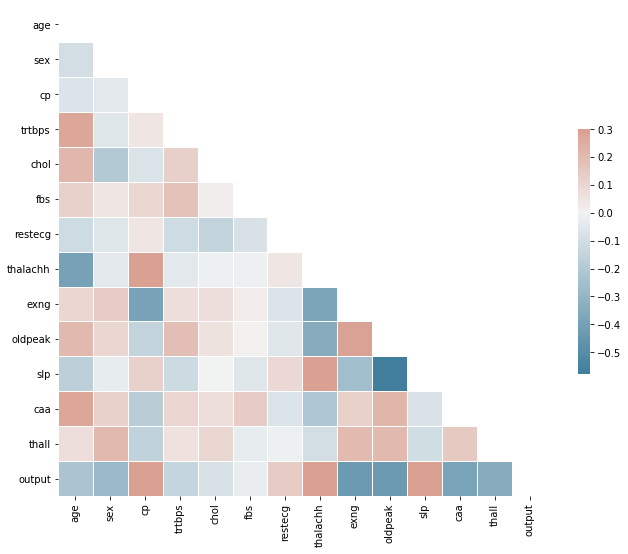

In [10]:
# Compute the correlation matrix
corr = heart_df.corr(method ='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
heart_df.corr(method ='pearson')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


**Some features are displaying some correlation - gives us hope we may have good data to train the model on**

**Specifically features cp, thalachh, excng, old peak and caa may have signifigance. Plotting the categories will diplay if the counts are balanced**

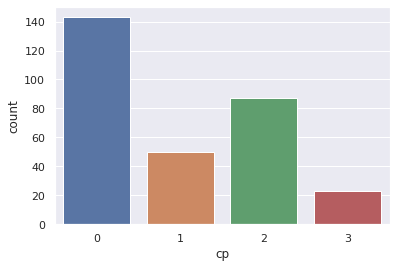

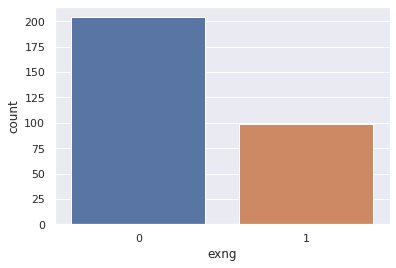

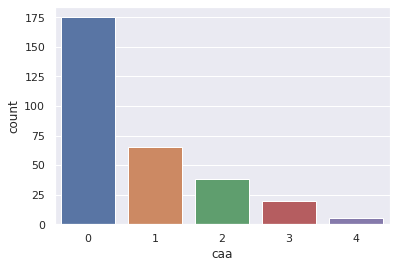

In [12]:
# Plot counts vs. cat features
sig_cat_feats = ["cp", "exng", "caa"]
for i in sig_cat_feats:
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(data=heart_df, x=i)
    plt.show()

**Lets check out how balanced the labels are (labels = prone to a heart attack or not)**

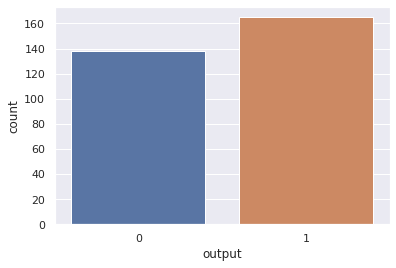

In [13]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=heart_df, x="output")
plt.show()

**Pretty balanced, way better than the stroke dataset I worked on previously**

# Okay enough data drooling, lets split the data and preprocess

**Lets split up the data:
train = 75%  |  test = 25%**

In [14]:
# Breakdown the data frame into attributes and label
X = heart_df.drop('output', axis=1)
y = heart_df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Set up pipelines:
Scale the integer features,
Categorize the discrete features with OneHot** 

In [15]:
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

In [16]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [17]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Breakdown heart dataframe into categories and numeric sections - this will prep the data for the pipeline**

In [18]:
numerical_feats = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
categorical_feats = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]

**Combine the category and numerical transformers as a preprocessor**

In [19]:
# Data cleaning and transforming
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_feats),
        ('cat', categorical_transformer, categorical_feats)])

# Model and Run

**List the classifiers as a list (will be easy to go back and add classifiers)**

In [20]:
# Run multiple models and compare
classifiers = [
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    ]

**Loop through the classifiers and run Pipeline and fit functions on the trainig set then predict test set based on the model**

In [21]:
print("** Following results reflect classifier models **")
classif_list = []
acc_list = []
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    
    # Predict the test labels
    preds = pipe.predict(X_test)
    
    # Calculate the accuracy and cofussion matrix
    acc_score = accuracy_score(y_test, preds)
    conf_matrix = confusion_matrix(y_test, preds)
    
    # Calculate how many preidctions were right and wrong
    n_labels_right = accuracy_score(y_test, preds, normalize=False)
    n_labels_total = y_test.size
      
    # Print details of classifiers, accuracy and cofussion matrix
    print("-------------------------------------------")
    print(classifier)
    print("Accuracy: ", acc_score*100)
    print("Predictions correct = ", n_labels_right)
    print("Predictions wrong   = ", n_labels_total - n_labels_right)
    print("Confussion matrix = \n", conf_matrix)
    
    # Put classifier and accuracy in list to extract the best at the end
    classif_list.append(classifier)
    acc_list.append(acc_score*100)

** Following results reflect classifier models **
-------------------------------------------
SVC(C=0.025, probability=True)
Accuracy:  53.94736842105263
Predictions correct =  41
Predictions wrong   =  35
Confussion matrix = 
 [[ 0 35]
 [ 0 41]]
-------------------------------------------
DecisionTreeClassifier()
Accuracy:  75.0
Predictions correct =  57
Predictions wrong   =  19
Confussion matrix = 
 [[25 10]
 [ 9 32]]
-------------------------------------------
RandomForestClassifier()
Accuracy:  86.8421052631579
Predictions correct =  66
Predictions wrong   =  10
Confussion matrix = 
 [[29  6]
 [ 4 37]]
-------------------------------------------
AdaBoostClassifier()
Accuracy:  80.26315789473685
Predictions correct =  61
Predictions wrong   =  15
Confussion matrix = 
 [[29  6]
 [ 9 32]]
-------------------------------------------
GradientBoostingClassifier()
Accuracy:  85.52631578947368
Predictions correct =  65
Predictions wrong   =  11
Confussion matrix = 
 [[29  6]
 [ 5 36]]
---

**See which model predicted the best**

In [22]:
# Output the best model by accuracy
print("-------------------------------------------")
print("** The Best Model Goes to ... **")
best_acc = max(acc_list)
index = acc_list.index(max(acc_list))
best_classif = classif_list[index]
print("The best accuracy model = ", best_classif)
print("With an accuracy = ", best_acc)
print("Complete.")

-------------------------------------------
** The Best Model Goes to ... **
The best accuracy model =  KNeighborsClassifier()
With an accuracy =  88.1578947368421
Complete.
